<a href="https://colab.research.google.com/github/Anitagg1/Phyton-Workshop/blob/main/last%20bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('hour.csv')

In [4]:
df.rename(columns={'dteday' : 'daytime', 'yr' : 'year', 'mnth' : 'month'}, inplace=True)

In [5]:
df.loc[df['year'] == 1, 'year'] = '2012'
df.loc[df['year'] == 0, 'year'] = '2011'

In [6]:
df.loc[df['season'] == 1, 'season'] = 'winter'
df.loc[df['season'] == 2, 'season'] = 'spring'
df.loc[df['season'] == 3, 'season'] = 'summer'
df.loc[df['season'] == 4, 'season'] = 'fall'

In [7]:
df.loc[df['weekday'] == 1, 'weekday'] = 'Monday'
df.loc[df['weekday'] == 2, 'weekday'] = 'Tuesday'
df.loc[df['weekday'] == 3, 'weekday'] = 'Wednesday'
df.loc[df['weekday'] == 4, 'weekday'] = 'Thursday'
df.loc[df['weekday'] == 5, 'weekday'] = 'Friday'
df.loc[df['weekday'] == 6, 'weekday'] = 'Saturday'
df.loc[df['weekday'] == 0, 'weekday'] = 'Sunday'

In [8]:
df.loc[df['holiday'] == 0, 'holiday'] = 'no'
df.loc[df['holiday'] == 1, 'holiday'] = 'yes'  

In [9]:
df.loc[df['weathersit'] == 1, 'weathersit'] = 'clear'
df.loc[df['weathersit'] == 2, 'weathersit'] = 'cloudy'
df.loc[df['weathersit'] == 3, 'weathersit'] = 'LRain'
df.loc[df['weathersit'] == 4, 'weathersit'] = 'Snow'

In [29]:
df= df.drop(['instant'], axis=1)

In [30]:
df['timestamp']= pd.to_datetime(df['daytime']) + pd.to_timedelta(df['hr'], unit='h')
df.head()

,daytime,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,timestamp
0,2011-01-01,winter,2011,1,0,no,Saturday,0,clear,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01,winter,2011,1,1,no,Saturday,0,clear,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01,winter,2011,1,2,no,Saturday,0,clear,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01,winter,2011,1,3,no,Saturday,0,clear,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01,winter,2011,1,4,no,Saturday,0,clear,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [34]:
# Changing the index for the new created column called 'timestamp"
df.index = df['timestamp'] 
df

,daytime,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,timestamp
timestamp,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01,winter,2011,1,0,no,Saturday,0,clear,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
2011-01-01 01:00:00,2011-01-01,winter,2011,1,1,no,Saturday,0,clear,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2011-01-01 02:00:00,2011-01-01,winter,2011,1,2,no,Saturday,0,clear,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
2011-01-01 03:00:00,2011-01-01,winter,2011,1,3,no,Saturday,0,clear,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
2011-01-01 04:00:00,2011-01-01,winter,2011,1,4,no,Saturday,0,clear,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31,winter,2012,12,19,no,Monday,1,cloudy,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
2012-12-31 20:00:00,2012-12-31,winter,2012,12,20,no,Monday,1,cloudy,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
2012-12-31 21:00:00,2012-12-31,winter,2012,12,21,no,Monday,1,clear,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00


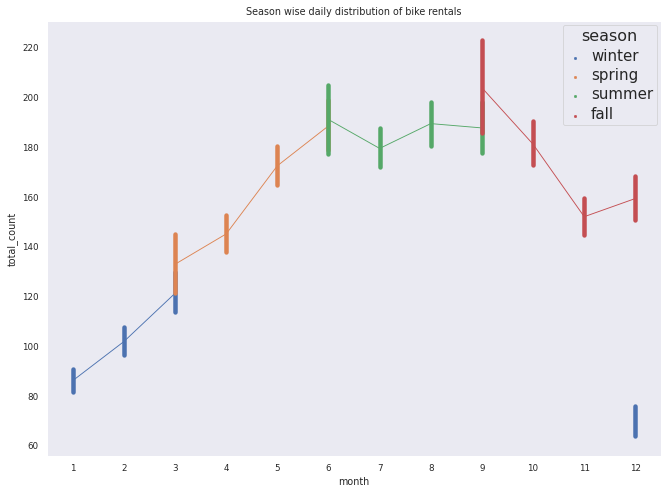

In [33]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = df[['month','registered','season']], x = 'month', y = 'registered',
              scale = 0.2, hue = 'season');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Season wise daily distribution of bike rentals',ylabel= 'total_count');

In [ ]:
df.loc['2011-08-01' : '2011-08-03',: ].resample('30T').count()['cnt'].plot(kind = 'bar')

In [38]:
df.loc['2011-08-01' : '2012-03-30',: ].resample('30T').count()['cnt']


timestamp
2011-08-01 00:00:00    1
2011-08-01 00:30:00    0
2011-08-01 01:00:00    1
2011-08-01 01:30:00    0
2011-08-01 02:00:00    1
                      ..
2012-03-30 21:00:00    1
2012-03-30 21:30:00    0
2012-03-30 22:00:00    1
2012-03-30 22:30:00    0
2012-03-30 23:00:00    1
Freq: 30T, Name: cnt, Length: 11663, dtype: int64

In [56]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
from plotnine.geoms import geom_bar, geom_text


In [64]:
import plotly.express as px

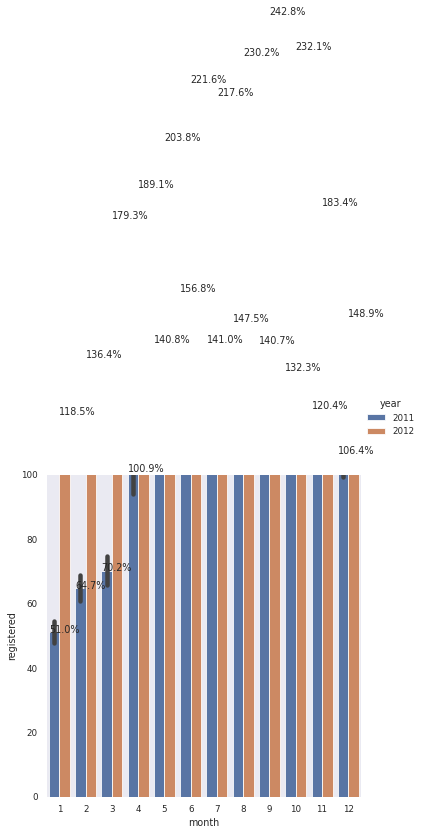

In [62]:
g = sns.catplot(x='month', y='registered', hue='year', kind='bar', data=df)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [69]:
fig = px.bar(df, x='month', y='cnt', 
                    barmode='group', text='cnt')

In [70]:
fig

In [72]:
df.corr()

,month,hr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
month,1.000000,-0.005772,-0.003477,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.005772,1.000000,0.002285,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
workingday,-0.003477,0.002285,1.000000,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
temp,0.201691,0.137603,0.055390,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.208096,0.133750,0.054667,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.164411,-0.276498,0.015688,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.135386,0.137252,-0.011830,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.068457,0.301202,-0.300942,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.122273,0.374141,0.134326,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.120638,0.394071,0.030284,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt 
  

  
# plot a Stacked Bar Chart using matplotlib 
df.plot( 
  x = 'month',  
  kind = 'barh',  
  stacked = True,  
  title = 'Percentage Stacked Bar Graph',  
  mark_right = True) 
  
df_total = df["registered"] + df["casual"]  
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n],  
                                         df[n], df_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center')

TypeError: ignored

In [ ]:
df